# 1. Backgroud
## 1.1 Situation
Product portfolio analysis provides investors with a comprehensive view of their investments, allowing them to assess risk and diversify effectively. By evaluating various assets, such as stocks, bonds, and real estate, investors can spread risk across different sectors and geographies, reducing vulnerability to market volatility.

Besides, it aids in aligning investment strategies with financial goals. Investors can tailor their portfolios to match their risk tolerance and objectives, whether it's long-term wealth accumulation or short-term income generation. Continuous portfolio analysis enables adjustments as market conditions change, helping investors make informed decisions and optimize returns while minimizing potential losses.

## 1.2 Analysis Plan
The analysis strategy aims to address the following key inquiries:

1. How can one pursue conservative investments that offer both stability and minimal risks?
2. Is it possible to optimize returns while maintaining a manageable level of risk?
3. What visual representation can effectively illustrate the solutions to the above two queries?

# 2. Processing
## 2.1 Data Structure
The data contains 1383 rows with 9 columns. Column Name:

1. Date
2. BTC
3. NYSE
4. NASDAQ
5. LSE
6. BTC_Volume
7. NYSE_Volume
8. NASDAQ_Volume
9. LSE_Volume

## 2.2 Method
These are keywords for this analysis.

- Sharpe Ratio
- Volatility
- Efficient Frontier

# 3. Process
## 3.1 Data Cleaning
This section to prepare data for the analysis.

In [13]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [14]:
pip install PyPortfolioOpt

In [15]:
data = pd.read_csv('./btc-nasdaq-nyse.csv')
data

,Date,BTC,NYSE,NASDAQ,LSE,BTC_Volume,NYSE_Volume,NASDAQ_Volume,LSE_Volume
0,2018-01-02,14982.099609,12902.719727,7006.899902,3742.0,16846600192,3397430000,1929700000,497857.0
1,2018-01-03,15201.000000,12957.280273,7065.529785,3749.0,16871900160,3544030000,2173130000,1009997.0
2,2018-01-04,15599.200195,13028.459961,7077.910156,3749.0,21783199744,3697340000,2103220000,669448.0
3,2018-01-05,17429.500000,13103.230469,7136.560059,3758.0,23840899072,3239280000,2024000000,2225274.0
4,2018-01-08,15170.099609,13114.349609,7157.390137,3744.0,18413899776,3246160000,2055010000,930995.0
...,...,...,...,...,...,...,...,...,...
1378,2023-06-26,30271.130859,15518.740234,13335.780273,8414.0,16493186997,3415030000,4430600000,1210754.0
1379,2023-06-27,30688.164062,15646.679688,13555.669922,8358.0,16428827944,3573500000,5053660000,847622.0
1380,2023-06-28,30086.246094,15617.360352,13591.750000,8390.0,14571500779,3739330000,4533270000,950657.0
1381,2023-06-29,30445.351562,15737.379883,13591.330078,8320.0,13180860821,3696660000,4388140000,1157071.0


In [16]:
df = data[['Date', 'BTC', 'NYSE', 'NASDAQ', 'LSE']]
df

,Date,BTC,NYSE,NASDAQ,LSE
0,2018-01-02,14982.099609,12902.719727,7006.899902,3742.0
1,2018-01-03,15201.000000,12957.280273,7065.529785,3749.0
2,2018-01-04,15599.200195,13028.459961,7077.910156,3749.0
3,2018-01-05,17429.500000,13103.230469,7136.560059,3758.0
4,2018-01-08,15170.099609,13114.349609,7157.390137,3744.0
...,...,...,...,...,...
1378,2023-06-26,30271.130859,15518.740234,13335.780273,8414.0
1379,2023-06-27,30688.164062,15646.679688,13555.669922,8358.0
1380,2023-06-28,30086.246094,15617.360352,13591.750000,8390.0
1381,2023-06-29,30445.351562,15737.379883,13591.330078,8320.0


In [17]:
df['Date']= pd.to_datetime(df['Date'])
df = df.set_index('Date')
df

<ipython-input-17-737957099ba3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']= pd.to_datetime(df['Date'])


,BTC,NYSE,NASDAQ,LSE
Date,,,,
2018-01-02,14982.099609,12902.719727,7006.899902,3742.0
2018-01-03,15201.000000,12957.280273,7065.529785,3749.0
2018-01-04,15599.200195,13028.459961,7077.910156,3749.0
2018-01-05,17429.500000,13103.230469,7136.560059,3758.0
2018-01-08,15170.099609,13114.349609,7157.390137,3744.0
...,...,...,...,...
2023-06-26,30271.130859,15518.740234,13335.780273,8414.0
2023-06-27,30688.164062,15646.679688,13555.669922,8358.0
2023-06-28,30086.246094,15617.360352,13591.750000,8390.0


# 4. Analysis
## 4.1 EDA
Exploratory Data Analysis (EDA) is a critical preliminary step in data analysis that involves the systematic examination of datasets to discover patterns, trends, and insights. EDA employs various statistical and visualization techniques to gain a deeper understanding of data, identify outliers, and generate hypotheses for further analysis.

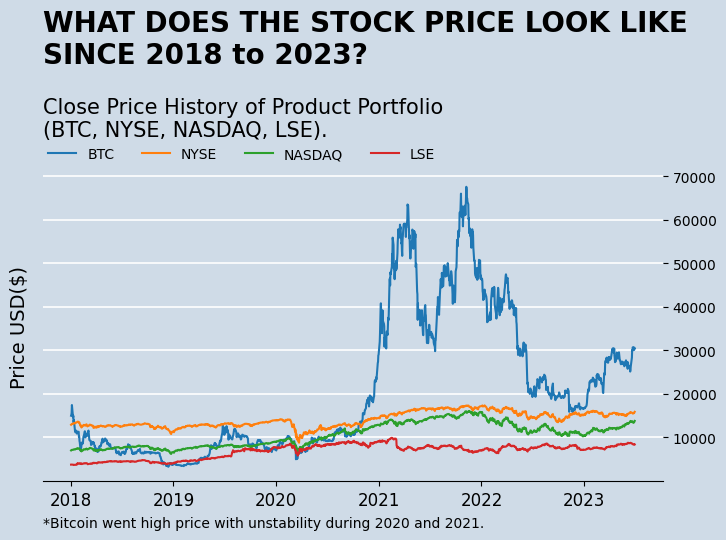

In [18]:
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"]='Arial'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['axes.facecolor']='#CFDBE7'
plt.rcParams['savefig.facecolor'] ='#CFDBE7'
plt.rc('axes',axisbelow=True)

fig=plt.figure(figsize=(8,4),dpi=100,facecolor='#CFDBE7')

for i in df.columns.values:
    plt.plot(df[i], label = i)

plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(axis="y",c='w',linewidth=1.2)

#plt.xlabel("Date",labelpad=10,size=18)
plt.ylabel("Price USD($)",labelpad=10,size=14)

plt.legend(loc=(0,1.02),ncol=4,frameon=False)

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.yaxis.set_ticks_position('right')

plt.text(0.,1.25,s='WHAT DOES THE STOCK PRICE LOOK LIKE\nSINCE 2018 to 2023?\n',transform=ax.transAxes,weight='bold',size=20)
plt.text(0,1.12,s='Close Price History of Product Portfolio\n(BTC, NYSE, NASDAQ, LSE).',transform=ax.transAxes,
         weight='light',size=15)

plt.text(0.,-0.15,s='*Bitcoin went high price with unstability during 2020 and 2021.',transform=ax.transAxes,weight='light',size=10)

plt.show()

In [19]:
returns = df.pct_change()
returns

,BTC,NYSE,NASDAQ,LSE
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,0.014611,0.004229,0.008367,0.001871
2018-01-04,0.026196,0.005493,0.001752,0.000000
2018-01-05,0.117333,0.005739,0.008286,0.002401
2018-01-08,-0.129631,0.000849,0.002919,-0.003725
...,...,...,...,...
2023-06-26,-0.013824,0.003193,-0.011617,-0.000950
2023-06-27,0.013777,0.008244,0.016489,-0.006656
2023-06-28,-0.019614,-0.001874,0.002662,0.003829


<Axes: xlabel='Date'>

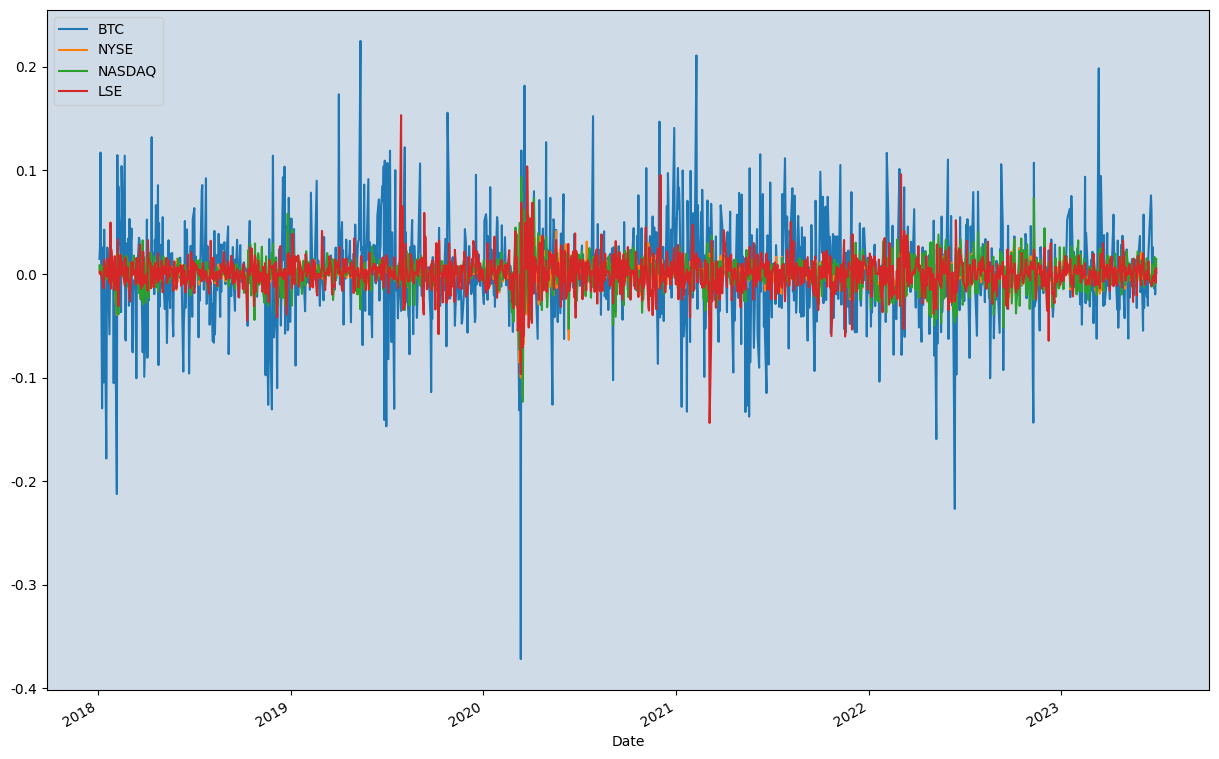

In [20]:
# Visualize the percentage change of everyday's return
returns.plot(figsize=(15,10))

In [21]:
df / df.iloc[0]

,BTC,NYSE,NASDAQ,LSE
Date,,,,
2018-01-02,1.000000,1.000000,1.000000,1.000000
2018-01-03,1.014611,1.004229,1.008367,1.001871
2018-01-04,1.041189,1.009745,1.010134,1.001871
2018-01-05,1.163355,1.015540,1.018505,1.004276
2018-01-08,1.012548,1.016402,1.021477,1.000534
...,...,...,...,...
2023-06-26,2.020487,1.202750,1.903235,2.248530
2023-06-27,2.048322,1.212665,1.934617,2.233565
2023-06-28,2.008146,1.210393,1.939767,2.242117


<Axes: xlabel='Date'>

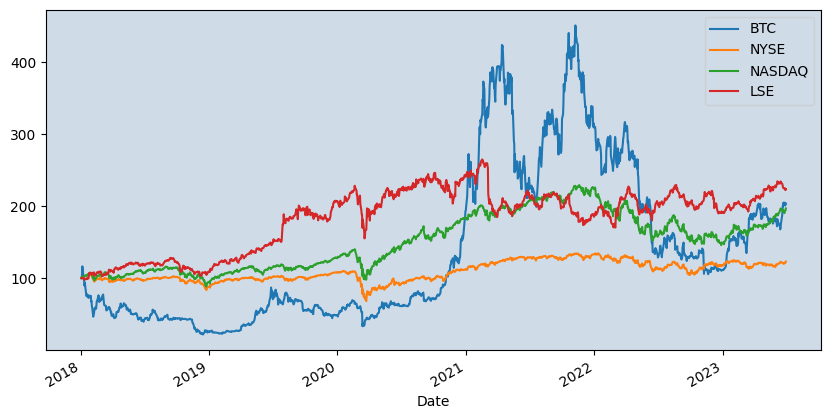

In [22]:
# Visualize the returns at every point aganst the first date
(df / df.iloc[0]*100).plot(figsize=(10,5))

In [23]:
returns.std()

BTC       0.044819
NYSE      0.012701
NASDAQ    0.015844
LSE       0.017547
dtype: float64

(-0.1, 0.1)

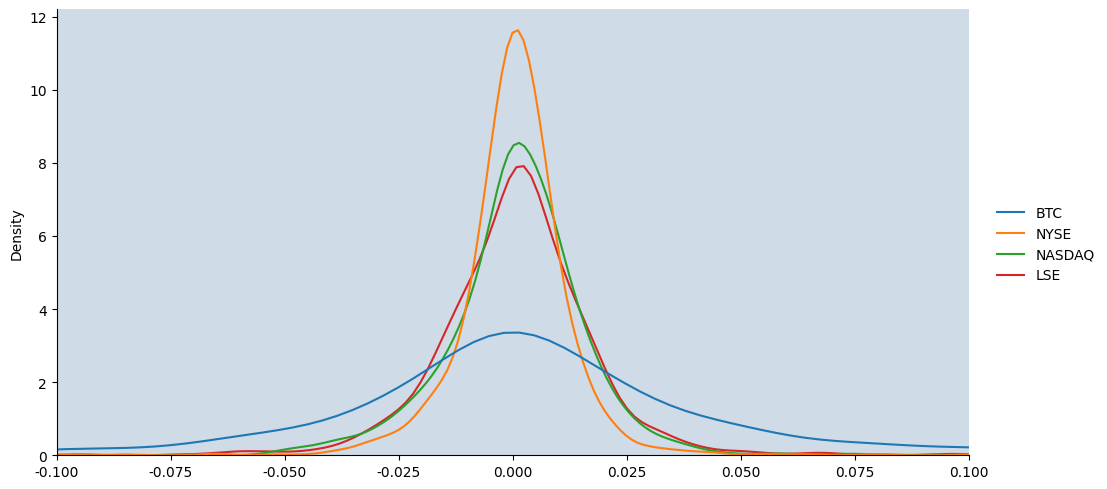

In [24]:
# Visualize the distribution
import seaborn as sns

sns.displot(data=returns, kind = 'kde', aspect = 2)
plt.xlim(-0.1, 0.1)

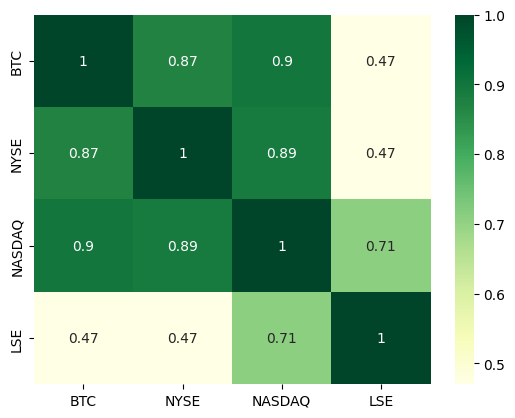

In [25]:
corr_df = df.corr().round(2)
sns.heatmap(corr_df, cmap='YlGn', annot=True)
plt.show()

In [26]:
corr_values = corr_df.abs().unstack()
sorted_values = pd.DataFrame(corr_values.sort_values(ascending=False), index= None)
sorted_values = sorted_values[(sorted_values[0] != 1)]
sorted_values.drop_duplicates()

,,0
BTC,NASDAQ,0.90
NYSE,NASDAQ,0.89
BTC,NYSE,0.87
NASDAQ,LSE,0.71
BTC,LSE,0.47


## 4.2 Efficient Frontier
Efficient Frontier represents a set of optimal portfolios that offer the highest expected returns for a given level of risk or the lowest risk for a specific expected return. By plotting different asset allocations on the Efficient Frontier, investors can make informed decisions about constructing their portfolios. The goal is to find the balance between risk and return that aligns with an investor's financial objectives and risk tolerance.

In [27]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

In [28]:
# Get the investment weight for the minimum Volatility

ef = EfficientFrontier(mu, S)
ef.min_volatility()
ef.clean_weights()

OrderedDict([('BTC', 0.00134),
             ('NYSE', 0.71192),
             ('NASDAQ', 0.0),
             ('LSE', 0.28674)])

In [29]:
# Show the performance with the minimum Volatility

ef.portfolio_performance(verbose=True)

Expected annual return: 7.3%
Annual volatility: 18.3%
Sharpe Ratio: 0.29


(0.07292819021978104, 0.18308980551475953, 0.28908321831995343)

In [30]:
# Get the investment weight for the maximum Sharpe Ratio

ef = EfficientFrontier(mu, S)
ef.max_sharpe()
ef.clean_weights()

OrderedDict([('BTC', 0.0156),
             ('NYSE', 0.0),
             ('NASDAQ', 0.46128),
             ('LSE', 0.52312)])

In [31]:
# Show the performance with the maximum Sharpe Ratio

ef.portfolio_performance(verbose=True)

Expected annual return: 14.5%
Annual volatility: 21.3%
Sharpe Ratio: 0.59


(0.14541463494057896, 0.21331735565570056, 0.5879251341508342)

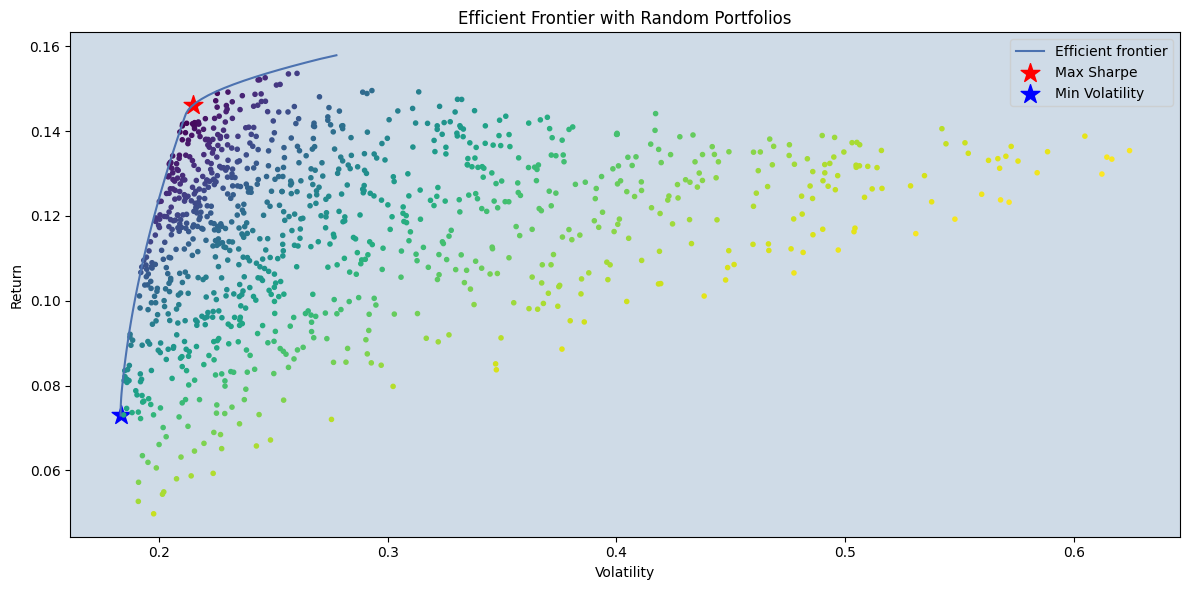

In [32]:
# Display the two points on a Efficient Frontier plot

from pypfopt import plotting

ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots(figsize=(12, 6))
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

ef_max_sharpe = EfficientFrontier(mu, S)
ef_max_sharpe.max_sharpe(risk_free_rate=0.05)
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance(risk_free_rate=0.05)
ax.scatter(std_tangent, ret_tangent, marker="*", s=200, c="r", label="Max Sharpe")

ef_min_volatility = EfficientFrontier(mu, S)
ef_min_volatility.min_volatility()
ret_min_volatility, std_min_volatility, _ = ef_min_volatility.portfolio_performance()
ax.scatter(std_min_volatility, ret_min_volatility, marker="*", s=200, c="blue", label="Min Volatility")

n_samples = 1000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")
ax.set_title("Efficient Frontier with Random Portfolios")
ax.legend()
plt.tight_layout()
plt.show()

# 5. Conclusion

This analysis employs graphical representations to illustrate the characteristics of various investment markets, including BTC, NYSE, NASDAQ, and LSE. These charts unveil a clear picture of Bitcoin's persistent price instability, where its potential for substantial value surges is counterbalanced by high volatility, leading to the risk of significant short-term losses. Notably, Bitcoin exhibits the highest standard deviation when compared to the more stable NYSE, NASDAQ, and LSE markets, underscoring its inherent instability.

Furthermore, the heatmap depicting market correlations highlights an interesting observation: Bitcoin displays the weakest correlation with LSE among the examined markets, suggesting its potential diversification benefits.

In addition, the inclusion of an Efficient Frontier plot proves invaluable for visualizing optimal investment packages within product portfolio analysis. This analysis yields two critical points: the minimum volatility and maximum Sharpe ratio investment weights. Notably, both recommendations discourage overcommitting investments in Bitcoin.

#### Minimum Volatility Portfolio:
Expected annual return: 7.3%, Annual volatility: 18.3%, Sharpe Ratio: 0.29

Weights:
- BTC: 0.00134
- NYSE: 0.71192
- NASDAQ: 0.0
- LSE: 0.28674

#### Maximum Sharpe Ratio Portfolio:
Expected annual return: 14.5%, Annual volatility: 21.3%, Sharpe Ratio: 0.59

Weights:
- BTC: 0.0156
- NYSE: 0.0
- NASDAQ: 0.46128
- LSE: 0.52312

Lastly, this analysis prompts further exploration:

1. Could similar principles be applied to allocate investments across different product lines in the manufacturing industry to optimize returns and manage risks effectively?

2. How might this approach be valuable for program or portfolio managers when allocating resources among various projects to achieve the best balance of risk and return?

3. In the context of strategic decision-making, could this methodology assist CEOs in diversifying their business holdings across different industries to mitigate risks and enhance their ability to navigate economic downturns?